<a href="https://colab.research.google.com/github/stepsbtw/Quantum-Computing-and-Algorithms/blob/main/grovers_ibm_textbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Algoritmo de Grover

Suponha que voce √© dado uma grande lista de $N$ itens. Entre esses itens existe um com uma propriedade √∫nica que queremos localizar, vamos chamar este de winner œâ.

Pense em cada item da lista como uma caixa de uma cor espec√≠fica, e o desejado, com uma cor diferente, digamos roxa:

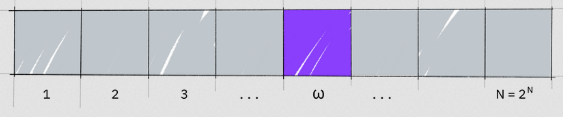

Para encontrar o item marcado - a caixa roxa -, usando computa√ß√£o cl√°ssica, seria necess√°rio em m√©dia checar $N/2$ itens, e no pior dos casos, todos os $N$.

Em um computador qu√¢ntico entretanto, podemos encontrar o item marcado em aproximadamente $\sqrt(N)$ passos com o truque de amplifica√ß√£o de amplitude de Grover.

Al√©m disso, o algoritmo n√£o usa a estrutura interna da lista, o que o torna gen√©rico. √â por isso que podemos ter essa melhora quadr√°tica qu√¢ntica em diversos problemas cl√°ssicos.

## Vis√£o Geral do Algoritmo
O algoritmo de Grover consiste em 3 passos algor√≠tmicos principais: Prepara√ß√£o dos estados, O Or√°culo e o Operador Difus√£o.

A prepara√ß√£o dos estados √© onde criamos o espa√ßo de busca, com todas as poss√≠veis sa√≠das.

O or√°culo √© o que marca a resposta certa (ou respostas).

O operador difus√£o amplifica essas respostas para que possam se destacar e ser medidas no fim do algoritmo.

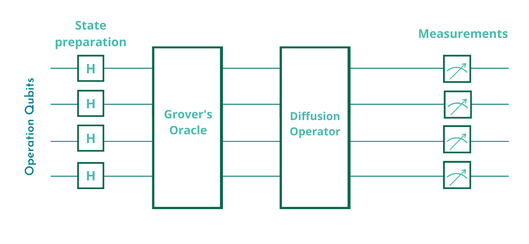

## Como funciona?

Antes de olhar a lista de itens, n√£o temos ideia de qual √© o item marcado.

Portanto qualquer chute ser√° t√£o bom quanto qualquer outro, o que pode ser expresso como uma superposi√ß√£o uniforme:

$$
|s‚ü© = \frac{1}{\sqrt(N)}‚àë^{N-1}_{x=0}|x‚ü©
$$

Se, nesse ponto, n√≥s medirmos a base {$|x‚ü©$}, a superposi√ß√£o iria colapsar, e de acordo com a **quinta lei qu√¢ntica**, para qualquer um dos estados base com a mesma probabilidade de $\frac{1}{N} = \frac{1}{2^n}$.

Nossa chance de chutar o valor certo œâ seria 1 em $2^n$, e em m√©dia precisar√≠amos tentar por volta de $N/2 = 2^n-1$ vezes at√© encontrar o item correto.



## Amplifica√ß√£o de Amplitude

Aqui que entra portanto a amplifica√ß√£o de amplitude, que √© como um computador qu√¢ntico pode aumentar essa probabilidade significantemente. Esse procedimento amplifica a amplitude do item marcado, o que diminui as amplitudes dos outros itens, assim medir o estado final retornaria o item certo com quase-certeza.

O algoritmo tem uma interpreta√ß√£o geom√©trica interessante em termos de duas **reflex√µes**, que geram uma rota√ß√£o em um plano bidimensional. Os √∫nicos dois estados especiais que precisamos considerar √© o desejado $|œâ‚ü©$ e a superposi√ß√£o uniforme $|s‚ü©$.

Esses dois vetores geram plano bidimensional no vetor de espa√ßos $‚ÑÇ^N$. Eles n√£o s√£o exatamente perpendiculares pois $|œâ‚ü©$ ocorre em superposi√ß√£o com amplitude $N^{-1/2}$ tamb√©m. Podemos entretanto introduzir um espa√ßo adicional $|s'‚ü©$ que est√° no espa√ßo gerado por estes dois vetores, que √© **perpendicular** a $|\omega‚ü©$ e √© obtido a partir de $|s‚ü©$, removendo $|œâ‚ü©$ e redimensionando-o.

**Passo 1**: O procedimento de amplifica√ß√£o come√ßa na superposi√ß√£o uniforme $|s‚ü©$. Pode ser f√°cilmente constru√≠da com:
$$
|s\rangle = H^{\otimes n} | 0 \rangle^n
$$

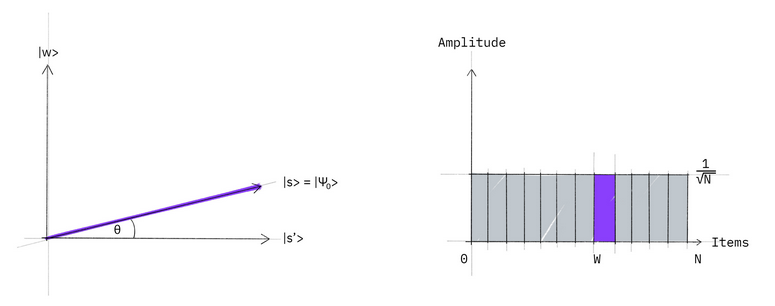

O gr√°fico a esquerda corresponde ao plano bidimensional gerado pelos vetores perpendiculares $|œâ‚ü©$ e $|s'‚ü©$.

Isso nos permite expressar o estado inicial como:
$$|s‚ü© = sinŒ∏|w‚ü© + cosŒ∏|s'‚ü©$$ onde:
$$Œ∏ = arcsin‚ü®s|œâ‚ü© = arcsin(\frac{1}{\sqrt{N}}) $$

O gr√°fico de barras a direita corresponde as amplitudes do estado $|s‚ü©$.

**Passo 2**: Aplicamos a reflex√£o do or√°culo $U_f$ no estado $|s‚ü©$.
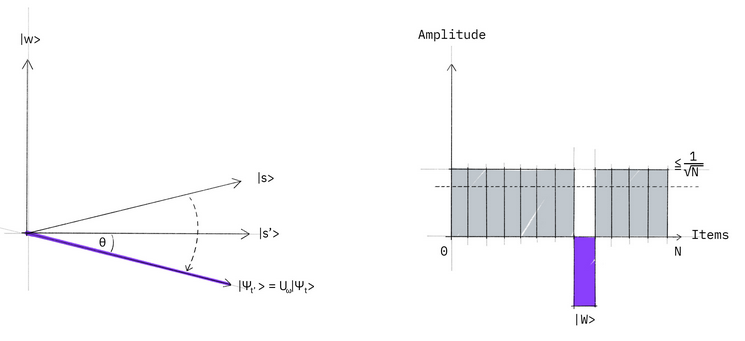

Geom√©tricamente, isso corresponde a uma reflex√£o do estado $|s‚ü©$ em respeito a $|s'‚ü©$. Essa transforma√ß√£o significa que a amplitude do estado $|œâ‚ü©$ fica negativa, que em resposta significa que a **amplitude m√©dia** (linha tracejada) diminuiu.

**Passo 3**: Agora aplicamos uma reflex√£o adicional $U_s$ sobre o estado $|s‚ü©$:

$$|s‚ü© = 2|s‚ü©‚ü®s| - I$$. Essa transforma√ß√£o mapeia o estado para : $U_sU_f|s‚ü©$ e completa a transforma√ß√£o.

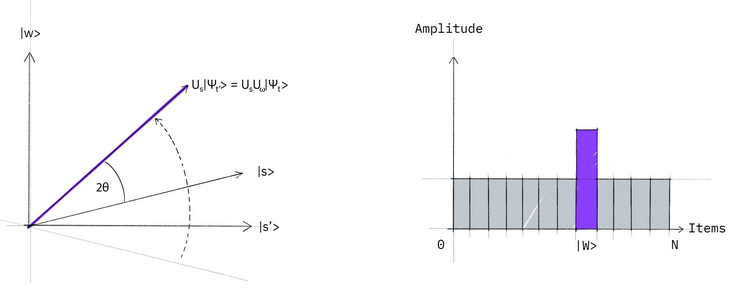

Duas reflex√µes **sempre** correspondem a uma rota√ß√£o. A transforma√ß√£o $U_sU_f$ rotaciona o estado inicial $|s‚ü©$ mais pr√≥ximo do estado desejado $|œâ‚ü©$. A a√ß√£o da reflex√£o $U_s$ no diagrama de amplitude pode ser entendida como uma reflex√£o sobre a amplitude m√©dia.

Como a amplitude m√©dia foi diminuida pela primeira reflex√£o, essa transforma√ß√£o impulsiona a amplitude negativa de $|œâ‚ü©$ para aproximadamente **tr√™s vezes** o seu valor original, e diminui as outras amplitudes.

Ent√£o voltamos ao **Passo 2** e repetimos a aplica√ß√£o. Esse processo √© repetido v√°rias vezes em 0 para o desejado.

Ap√≥s $t$ passos, estaremos no estado: $$|ùúì_t‚ü© = (U_sU_f)^t|s‚ü©$$

### Otimalidade
Quantas vezes precisamos aplicar essa rota√ß√£o? Acaba que aproximadamente $\sqrt{N}$ √© o suficiente.

Isso fica claro quando olhamos para as amplitudes do estado $|ùúì‚ü©$.

Vimos que a amplitude de $|œâ‚ü©$ cresce linearmente com o n√∫mero de aplica√ß√µes $‚âàtN^{-1/2}$.

Entretanto, como estamos lidando com amplitudes e n√£o probabilidades, a dimens√£o do vetor de espa√ß√µes entra como ra√≠z quadrada. Ou seja, exatamente, √© a amplitude que est√° sendo amplificada n√£o somente a probabilidade.

Para calcular o n√∫mero de rota√ß√µes necess√°rias, precisamos saber o tamanho do espa√ßo de busca, e o n√∫mero de sa√≠das que estamos procurando.

$$
t = ‚åä\frac{\pi}{4}\sqrt{\frac{N}{m}}‚åã
$$

Onde N √© o tamanho do espa√ßo de busca e m o n√∫mero de respostas que queremos.

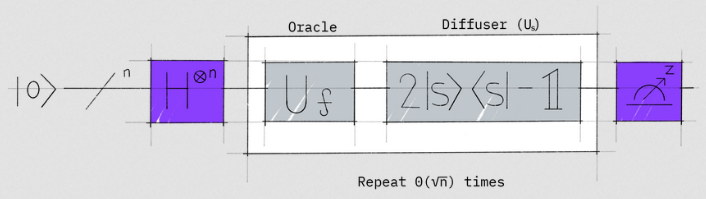

# Grover Passo a Passo

## 1. Preparando o espa√ßo de busca
Nossa "base de dados" ser√° composto por todos os poss√≠veis estados b√°sicos que nosso qubits podem estar.

Exemplo: Se temos 3 qubits, $|000‚ü©,|001‚ü©,‚ãØ,|111‚ü©$, isto √©: os estados $|0‚ü© ‚Üí |7‚ü©$. Nesse caso, o tamanho do nosso espa√ßo de busca seria $N = 2^n = 8$.

## 2. Criando o Or√°culo
Adiciona uma fase negativa para os estados solu√ß√µes para que eles possam se destacar do resto e serem medidos. Isto √©, pra qualquer estado $|x‚ü©$ na base:

$$
U_\omega|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle \quad \text{if} \; x \neq \omega \\
-|x\rangle \quad \text{if} \; x = \omega \\
\end{aligned}
$$

Esse or√°culo ser√° uma matriz diagonal, onde a entrada correspondente ao item desejado ir√° ter fase negativa. Por exemplo se temos 3 qubits e $œâ = 101$, nosso or√°culo ser√° a matriz:

$$
U_\omega =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{aligned}
\\
\\
\\
\\
\\
\\
\leftarrow \omega = \text{101}\\
\\
\\
\\
\end{aligned}
$$

O que faz o algoritmo de Grover t√£o poderoso √© a facilidade de converter o problema para um or√°culo desta forma.

Problemas NP, por exemplo, o **Sudoku**. Podemos f√°cilmente verificar a solu√ß√£o, mas encontr√°-la √© dif√≠cil.

Para esses tipos de problemas podemos criar uma fun√ß√£o $f$ que pega uma solu√ß√£o proposta $x$ e retorna $f(x) = 0$ se $x$ n√£o for solu√ß√£o ($x \neq œâ$) e $f(x) = 1$ se $x$ √© solu√ß√£o valida, ($x = œâ$).

Nosso or√°culo pode ser descrito como:

$$
U_œâ|x‚ü© = (-1)^{f(x)}|x‚ü©
$$

e a matriz do or√°culo ser√° diagonal da forma:

$$
U_\omega =
\begin{bmatrix}
(-1)^{f(0)} &   0         & \cdots &   0         \\
0           & (-1)^{f(1)} & \cdots &   0         \\
\vdots      &   0         & \ddots & \vdots      \\
0           &   0         & \cdots & (-1)^{f(2^n-1)} \\
\end{bmatrix}
$$


## Constru√ß√£o do Circuito Qu√¢ntico do Or√°culo

Se temos a fun√ß√£o cl√°ssica $f(x)$, podemos converter ela para o circuito revers√≠vel da forma:

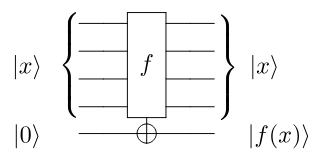

Se inicializarmos o qubit de sa√≠da com o estado $|-‚ü©$, torna isso em um Or√°culo de Grover.
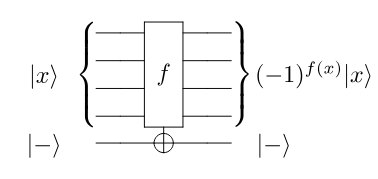

Podemos ent√£o ignorar o Qubit auxiliar $|-‚ü©$.

## 3. Operador de Difus√£o
Finalmente, ap√≥s o or√°culo marcar a resposta correta, a transformando em negativa, o √∫ltimo passo √© aplicar o operador difus√£o.

A constru√ß√†o desse operador depende em que decidimos usar para preparar nossos estados iniciais. Geralmente o operador de difus√£o possui a seguinte constru√ß√£o:

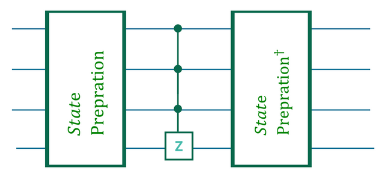

# Exemplo: 2 Qubits

Vamos dar uma olhada no caso de que $N = 4$, feito com 2 qubits. Nesse caso particular, apenas **uma rota√ß√£o** √© necess√°ria para rotacionar o estado inicial $|s‚ü©$ para o desejado |œâ‚ü©.

1. Ent√£o:
$$
Œ∏ = arcsin\frac{1}{2} = \frac{\pi}{6}
$$

2. Ap√≥s $t$ passos, temos:

$$
(U_sU_œâ)^t|s‚ü© = senŒ∏_t|œâ‚ü© + cosŒ∏_t|s'‚ü©
$$

# Algoritmo de Grover e Amplifica√ß√£o de Amplitude

O algoritmo de Grover foi introduzido por [Lov Grover em 1996 ](https://arxiv.org/abs/quant-ph/9605043). Foi inicialmente proposto para resolver problemas de busca n√£o estruturada, isto √©, para encontrar um elemento marcado em uma base de dados n√£o estruturada.

Entretanto, o algoritmo de Grover √© agora uma subrotina para v√°rios outros algoritmos como a [Grover Adaptative Search](https://arxiv.org/abs/1912.04088)